<a href="https://www.kaggle.com/code/lalit7881/india-city-aqi-analysis-2015-2023?scriptVersionId=297803005" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-city-air-quality-index-dataset-20152023/india_city_aqi_2015_2023.csv


## India City AQI Analysis (2015–2023)

## Description

The India City Air Quality Index (AQI) Dataset (2015–2023) provides a comprehensive, multi-year record of air pollution levels across major Indian cities. This dataset captures daily or monthly Air Quality Index (AQI) values along with key pollutant concentrations such as PM2.5, PM10, NO₂, SO₂, CO, O₃, and other atmospheric indicators that influence urban air quality.

Spanning eight years, the dataset enables in-depth analysis of pollution trends, seasonal variations, and city-wise comparisons. It helps identify patterns such as winter pollution spikes, festival-related emission surges, industrial impact, vehicular pollution influence, and the effect of environmental policies or lockdown periods on air quality levels.

Key analytical applications include:

📊 Trend analysis of AQI across cities over time

🌆 City-wise pollution comparison and ranking

📅 Seasonal and yearly variation analysis

🏭 Identification of high-risk pollution periods

📈 Forecasting future AQI trends using time-series models

🚨 Classification of air quality categories (Good, Moderate, Poor, Severe)

This dataset is valuable for environmental researchers, data analysts, policy makers, public health professionals, and urban planners. It supports data-driven decision-making to design pollution control strategies, improve public health awareness, and evaluate the effectiveness of environmental regulations.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/india-city-air-quality-index-dataset-20152023/india_city_aqi_2015_2023.csv")

In [3]:
df.head()

,city,date,pm25,pm10,no2,so2,co,o3,aqi,aqi_category
0,Delhi,2015-01-01,99.868566,147.103280,49.715328,19.615149,0.729754,46.487946,103,Moderate
1,Delhi,2015-01-02,143.168513,208.517207,32.957884,14.712800,0.660975,43.014054,141,Moderate
2,Delhi,2015-01-03,89.678491,101.412886,14.126233,9.188562,0.496151,54.713710,82,Satisfactory
3,Delhi,2015-01-04,43.679037,65.432963,61.984732,10.871118,0.820258,28.628777,50,Good
4,Delhi,2015-01-05,58.224691,110.443143,22.735096,13.878490,0.619808,45.624594,69,Satisfactory


In [4]:
df.tail()

,city,date,pm25,pm10,no2,so2,co,o3,aqi,aqi_category
32865,Ahmedabad,2023-12-27,104.189767,125.996540,54.037235,9.458740,1.214473,69.390920,102,Moderate
32866,Ahmedabad,2023-12-28,78.296822,126.139390,21.102546,14.506215,0.383592,45.033878,83,Satisfactory
32867,Ahmedabad,2023-12-29,133.796319,174.428556,14.262469,9.569303,1.058658,65.074983,127,Moderate
32868,Ahmedabad,2023-12-30,34.293435,67.092247,43.458757,13.238309,0.805538,27.954360,44,Good
32869,Ahmedabad,2023-12-31,52.469690,82.606862,27.533347,7.257668,0.636559,63.218900,60,Satisfactory


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32870 entries, 0 to 32869
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          32870 non-null  object 
 1   date          32870 non-null  object 
 2   pm25          32870 non-null  float64
 3   pm10          32870 non-null  float64
 4   no2           32870 non-null  float64
 5   so2           32870 non-null  float64
 6   co            32870 non-null  float64
 7   o3            32870 non-null  float64
 8   aqi           32870 non-null  int64  
 9   aqi_category  32870 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.5+ MB


In [6]:
df.describe()

,pm25,pm10,no2,so2,co,o3,aqi
count,32870.000000,32870.000000,32870.000000,32870.000000,32870.000000,32870.000000,32870.000000
mean,80.757235,130.764579,40.165472,11.998476,0.802118,49.979732,88.122665
std,39.063392,43.937066,14.849411,4.882239,0.298156,14.912687,31.895407
min,5.000000,10.000000,5.000000,2.000000,0.100000,10.000000,11.000000
25%,53.154180,99.980177,29.990183,8.570939,0.599976,39.892800,65.000000
50%,80.336105,130.023453,40.141525,11.977979,0.800137,49.977582,88.000000
75%,107.496909,160.634804,50.190860,15.315028,1.003899,60.025440,110.000000
max,248.081036,330.014171,97.446733,34.395421,1.929870,118.431721,221.000000


In [7]:
df.dtypes

city             object
date             object
pm25            float64
pm10            float64
no2             float64
so2             float64
co              float64
o3              float64
aqi               int64
aqi_category     object
dtype: object

In [8]:
df.shape

(32870, 10)

In [9]:
df.isnull().sum()

city            0
date            0
pm25            0
pm10            0
no2             0
so2             0
co              0
o3              0
aqi             0
aqi_category    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['city', 'date', 'pm25', 'pm10', 'no2', 'so2', 'co', 'o3', 'aqi',
       'aqi_category'],
      dtype='object')

## Data visualizations

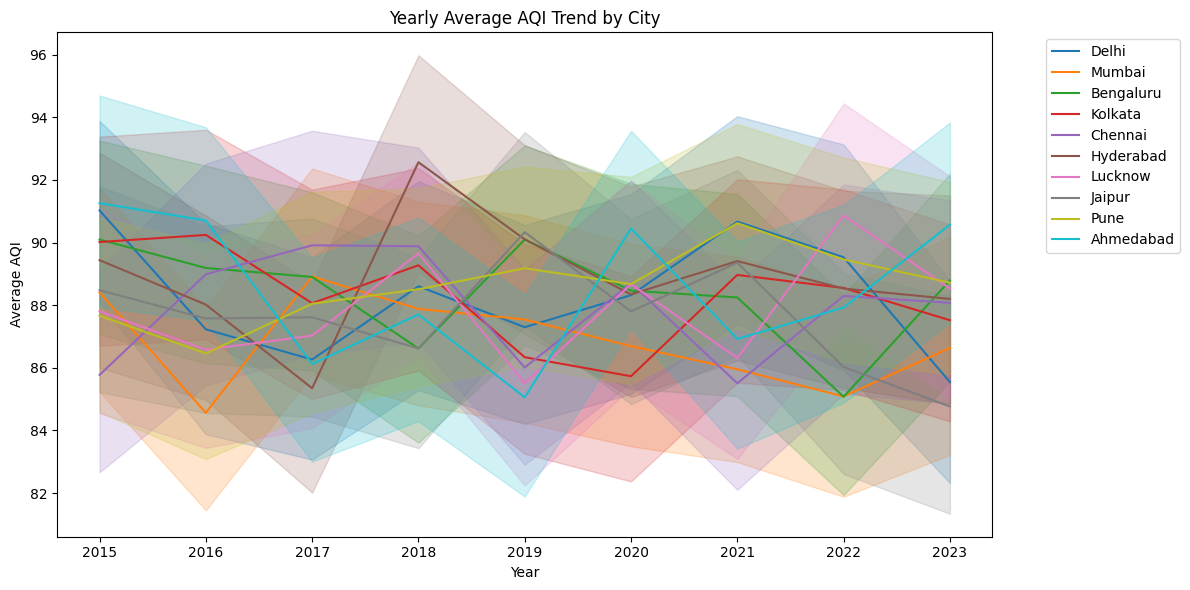

In [12]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='year', y='aqi', hue='city', estimator='mean')
plt.title("Yearly Average AQI Trend by City")
plt.ylabel("Average AQI")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()


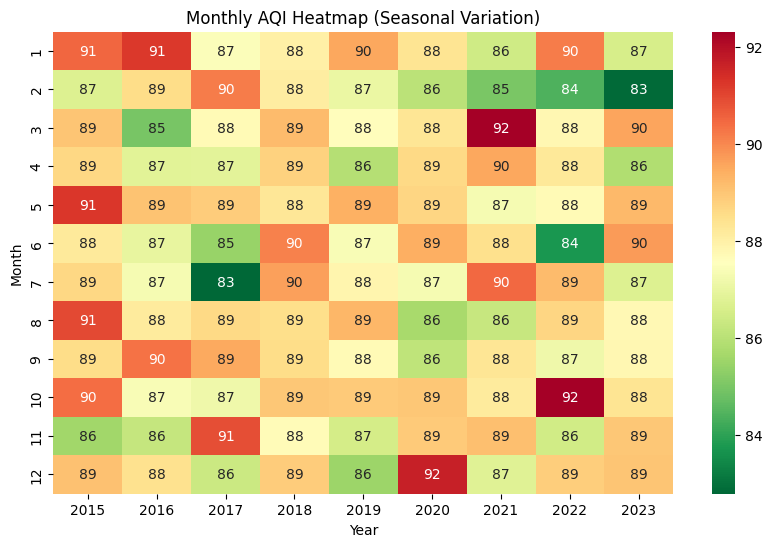

In [13]:
df['month'] = df['date'].dt.month

pivot_table = df.pivot_table(values='aqi',
                             index='month',
                             columns='year',
                             aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap='RdYlGn_r', annot=True, fmt=".0f")
plt.title("Monthly AQI Heatmap (Seasonal Variation)")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()


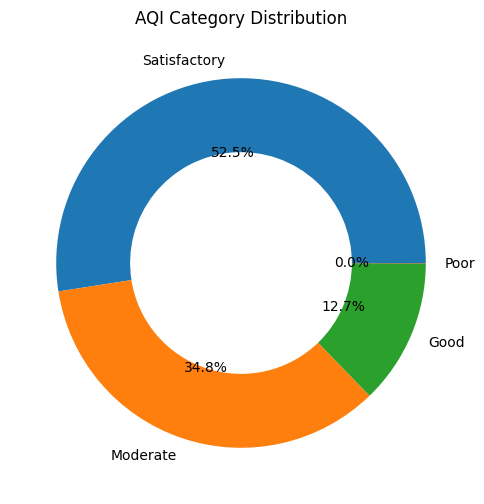

In [14]:
category_counts = df['aqi_category'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(category_counts,
        labels=category_counts.index,
        autopct='%1.1f%%',
        wedgeprops=dict(width=0.4))
plt.title("AQI Category Distribution")
plt.show()


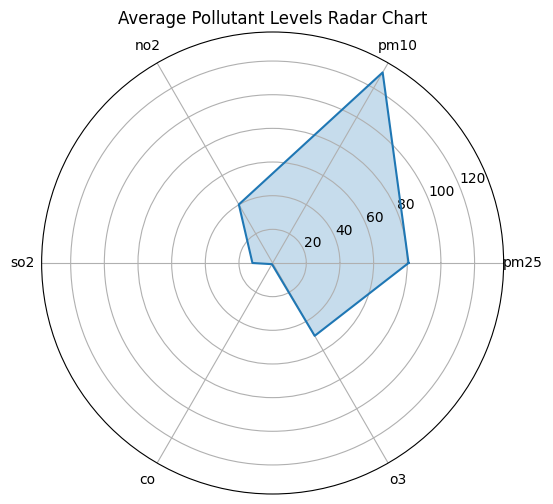

In [15]:
import numpy as np

pollutants = ['pm25','pm10','no2','so2','co','o3']
avg_values = df[pollutants].mean()

angles = np.linspace(0, 2*np.pi, len(pollutants), endpoint=False).tolist()
values = avg_values.tolist()
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, values)
ax.fill(angles, values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(pollutants)
plt.title("Average Pollutant Levels Radar Chart")
plt.show()


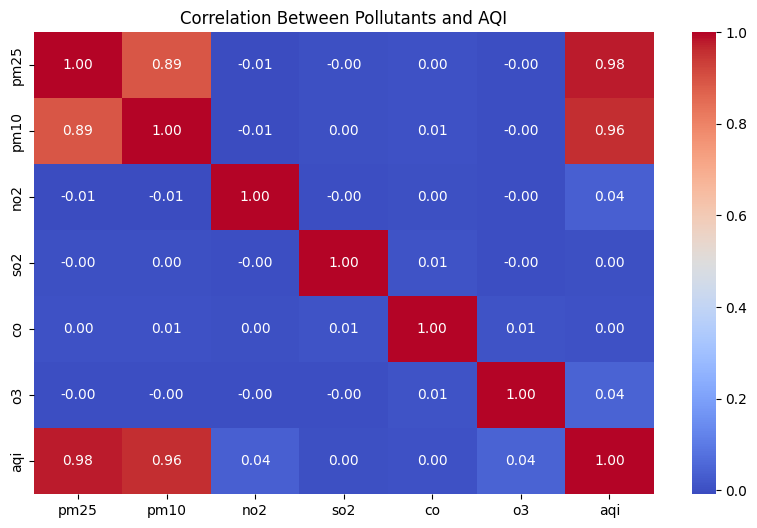

In [16]:
plt.figure(figsize=(10,6))
corr = df[['pm25','pm10','no2','so2','co','o3','aqi']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Pollutants and AQI")
plt.show()


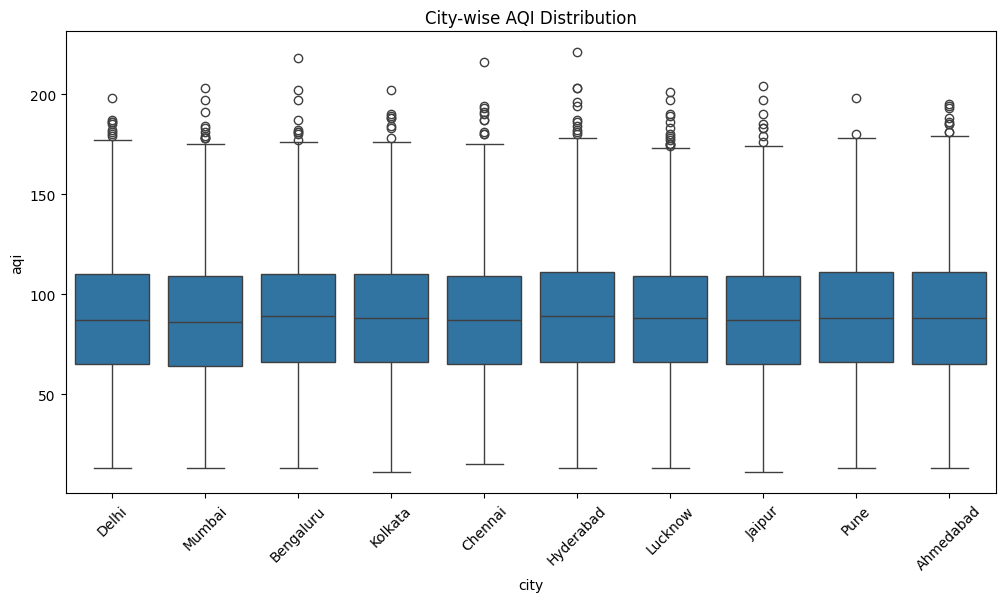

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='city', y='aqi')
plt.xticks(rotation=45)
plt.title("City-wise AQI Distribution")
plt.show()


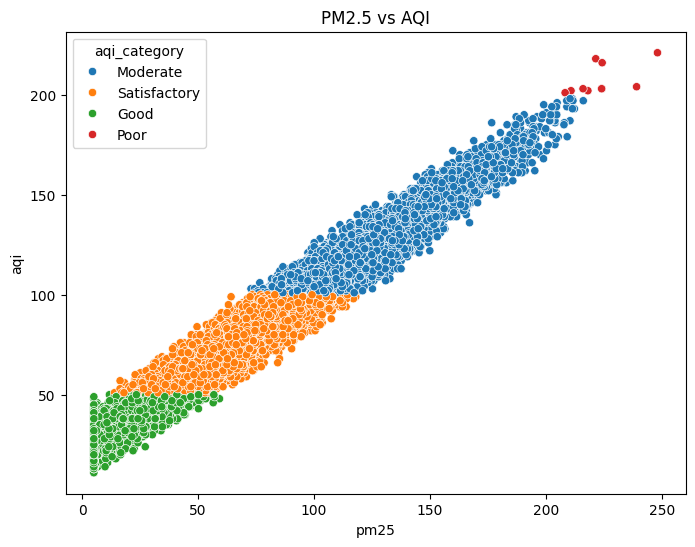

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,
                x='pm25',
                y='aqi',
                hue='aqi_category')
plt.title("PM2.5 vs AQI")
plt.show()


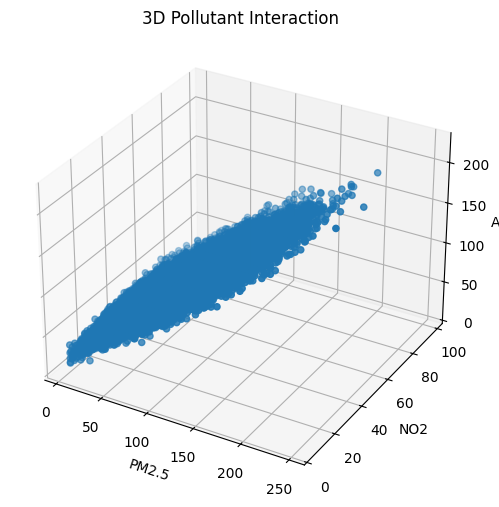

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['pm25'], df['no2'], df['aqi'])

ax.set_xlabel('PM2.5')
ax.set_ylabel('NO2')
ax.set_zlabel('AQI')
plt.title("3D Pollutant Interaction")
plt.show()


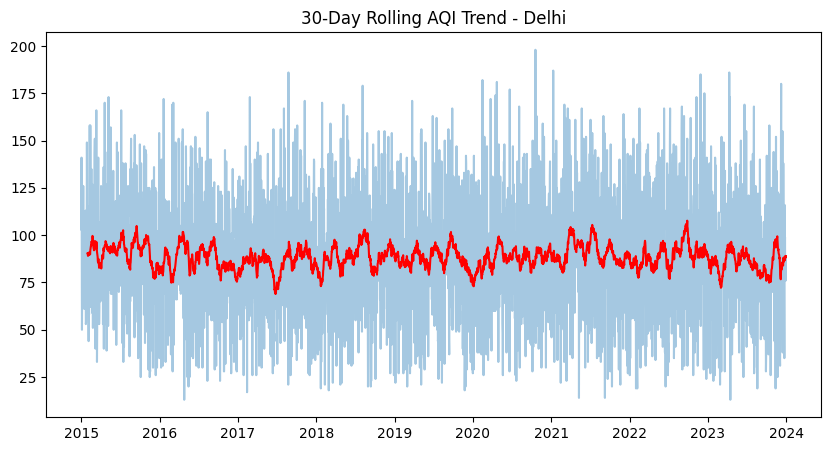

In [20]:
city_name = df['city'].unique()[0]
city_data = df[df['city'] == city_name].sort_values('date')

city_data['rolling_aqi'] = city_data['aqi'].rolling(window=30).mean()

plt.figure(figsize=(10,5))
plt.plot(city_data['date'], city_data['aqi'], alpha=0.4)
plt.plot(city_data['date'], city_data['rolling_aqi'], color='red')
plt.title(f"30-Day Rolling AQI Trend - {city_name}")
plt.show()


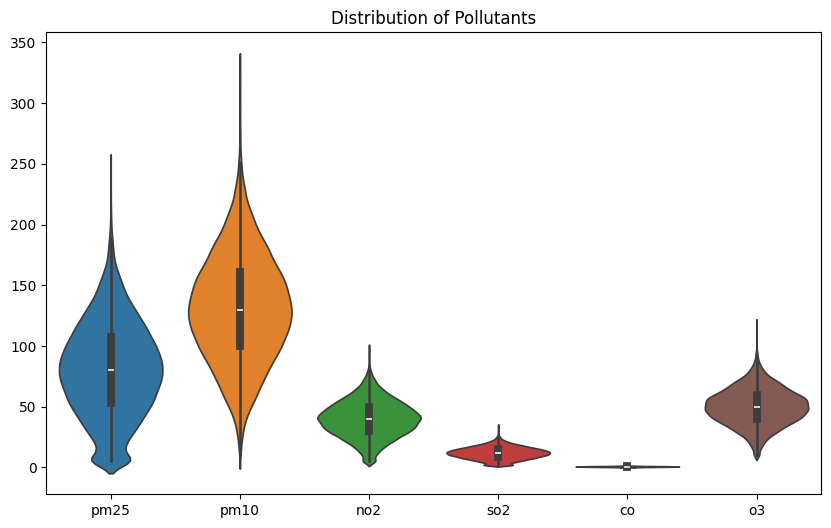

In [21]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df[['pm25','pm10','no2','so2','co','o3']])
plt.title("Distribution of Pollutants")
plt.show()


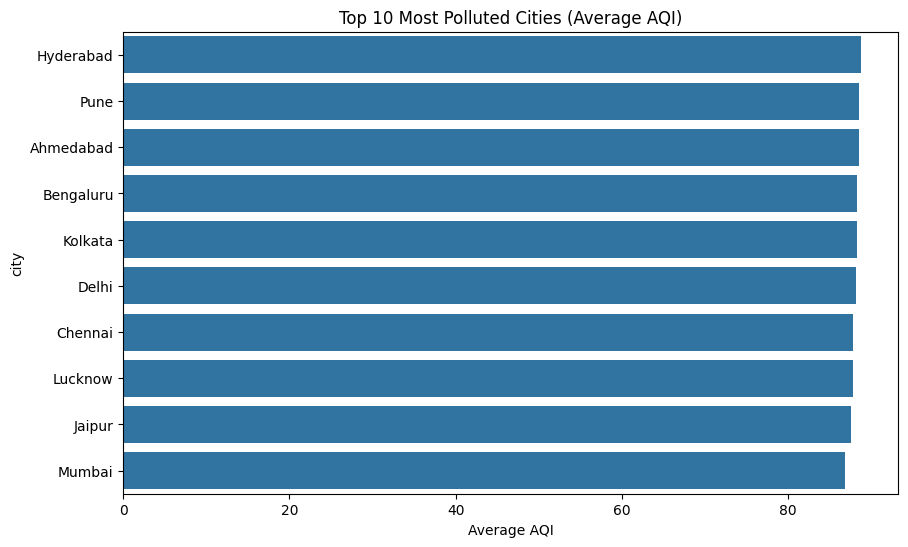

In [22]:
top_cities = df.groupby('city')['aqi'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 10 Most Polluted Cities (Average AQI)")
plt.xlabel("Average AQI")
plt.show()


## Feature engg

In [23]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
y = df["aqi_category"]
X = df.drop("aqi_category", axis=1)

# Convert date to useful features
X["date"] = pd.to_datetime(X["date"])
X["year"] = X["date"].dt.year
X["month"] = X["date"].dt.month
X = X.drop("date", axis=1)


In [25]:
categorical_cols = ["city"]
numeric_cols = X.columns.difference(categorical_cols)


In [26]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(class_weight="balanced"),
}


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [29]:
results = {}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train
    pipe.fit(X_train, y_train)
    
    # Predict
    y_pred = pipe.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Cross Validation
    f1_scores = cross_val_score(pipe, X, y, cv=cv, scoring="f1_macro")
    
    results[name] = {
        "accuracy": acc,
        "f1_mean": f1_scores.mean()
    }
    
    print("="*60)
    print(name)
    print("Accuracy:", acc)
    print("F1 Macro (CV Mean):", f1_scores.mean())
    print(classification_report(y_test, y_pred))


Logistic Regression
Accuracy: 0.9884393063583815
F1 Macro (CV Mean): 0.8474011378557341
              precision    recall  f1-score   support

        Good       0.93      1.00      0.97       836
    Moderate       0.99      1.00      1.00      2287
        Poor       0.29      1.00      0.44         2
Satisfactory       1.00      0.98      0.99      3449

    accuracy                           0.99      6574
   macro avg       0.80      0.99      0.85      6574
weighted avg       0.99      0.99      0.99      6574

KNN
Accuracy: 0.9174018862184362
F1 Macro (CV Mean): 0.6831809524511421
              precision    recall  f1-score   support

        Good       0.93      0.80      0.86       836
    Moderate       0.95      0.91      0.93      2287
        Poor       0.00      0.00      0.00         2
Satisfactory       0.90      0.95      0.92      3449

    accuracy                           0.92      6574
   macro avg       0.69      0.67      0.68      6574
weighted avg       0.92  

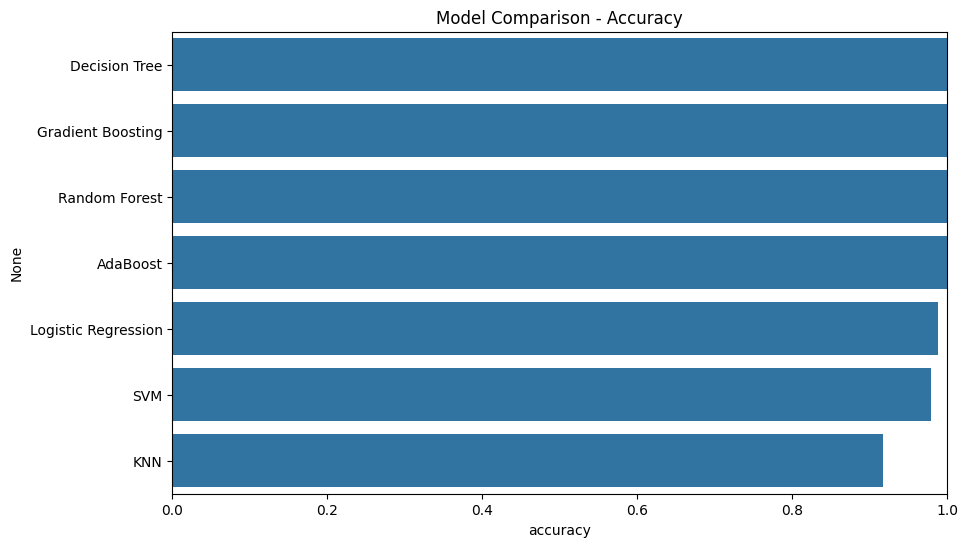

In [30]:
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df.sort_values("accuracy", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=comparison_df["accuracy"], y=comparison_df.index)
plt.title("Model Comparison - Accuracy")
plt.xlim(0,1)
plt.show()


Best Model: Decision Tree


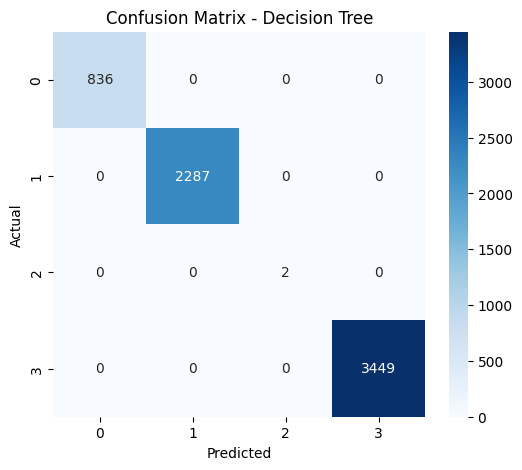

In [31]:
best_model_name = comparison_df.index[0]
print("Best Model:", best_model_name)

best_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", models[best_model_name])
])

best_pipe.fit(X_train, y_train)
y_pred_best = best_pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Thank you...pls upvote!!!!!